# Data Exploration (8 points):

Each item is worth 2 points.

For each question that asks to implement a function, implement it in the top cell where it is defined and then execute the function in the code cell provided below the question. <br>
You should base your answers on the output.<br>
You are allowed to implement and use additional functions. These would be defined and implemented in the
cell directly below the questions they were implemented for.

All the textual answers should be based on and justified with output from the data in the code cell above.<br>
For example, if the question asks about the correlation value, the code calculating it should appear above the answer, and the value should be in the output.
The answers should be concise and written in your own words.

### <span style="color:red">Do Not Modify the Structure of this Notebook, don't add/remove/move cells or change their type (Code/Markdown) </span>

1. [Implement the function `print_df_summary(df)`, then read the feather file 'TrainQuestionsDF.feather.zstd'<br> into a pandas dataframe and print its summary using the implemented function](#q1)
<br><br>
2. [We intend to predict the label for each sample, check if the data is balanced, or are there certain labels that are more common than others? <br>Justify you answer with an output from the data](#q2)
<br><br>
3. [Implement the functions `select_numeric_non_id_columns(df)` and `plot_pairwise_relationships(df)`, then generate a plot of the pairwise relationships between all the numerical columns in the dataset, excluding the id columns. <br>Which are the two most correlated columns, and what is the Pearson correlation coefficient between them?](#q3)
<br><br>
4. [Implement the function `plot_central_tendency_per_label(df, column)`, then select one of the numerical columns and generate the plot for it. What can you conclude from it?](#q4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from numpy import mean


In [3]:
# TODO: Set the random seed as your student id (only numbers)
RANDOM_SEED = 3955778
np.random.seed(RANDOM_SEED)

In [4]:
# This cell is for functions given to you to use

def read_feather_to_df(feather_file_name):
    """
    The function expects to receive a path to feather file,
    it will read the file from the disk into a pandas dataframe
    :param feather_file_name: a string or path like object
    :return: pd.DataFrame
    """
    return pd.read_feather(feather_file_name)

In [5]:
# This cell is for all the functions you are expected to implement.
# You should implement them here and only call them below when they are mentioned in a question.

def print_df_summary(df):
    """
    This function will print a short summary of a df in the following format:
        Number of samples (rows): <number>
        Number of features (columns): <number>
        The column names and dtypes: <column names> <column dtype>
    :param df: pd.DataFrame
    """
    print(df.shape)
    
    for col in df.columns:
        print(col)
    pass


def select_numeric_non_id_columns(df):
    """
    Return a subset of a DataFrame’s columns based on the column dtypes,
    including only numerical columns and excluding columns with the string id (case-insensitive) in their name
    :param df: pd.DataFrame
    :return: pd.DataFrame
    """
    Z = (df.select_dtypes(include=['int64'], exclude=["string"])).drop('Id',axis=1)
    
    return Z
    
    pass


def plot_pairwise_relationships(df):
    """
    Plot pairwise relationships between all numerical columns
    :param df: pd.DataFrame
    """
    sns.set(style="ticks", color_codes=True)
    
    g = sns.pairplot(df)
    
    plt.show(g)
    
    pass


def plot_central_tendency_per_label(df, column):
    """
    Plot point estimates for the given column of the mean, per label.
    On the y-axis the values of the given column, and on the x-axis all the labels.
    The plot can be a point plot, bar plot, or similar.
    The labels on the x-axis should be in decreasing order of their point estimates,
    and all labels are on the plot are readable (e.g. not overlapping or too small)
    :param df: pd.DataFrame
    :param column: string, a name of a column in the df
    """
    X = df[column]
    
    label_data = read_feather_to_df('TrainQuestionsDF.feather.zstd')
    
    Y = label_data["Label"]
    
    plt.figure(figsize = (15,8))
    sns.barplot(Y, X, estimator = mean)
    plt.show();
    
    return
    

### <a name="q1"></a> 1. Implement the function `print_df_summary(df)`, then read the feather file 'TrainQuestionsDF.feather.zstd' into a pandas dataframe and print its summary using the implemented function

In [6]:

train_df = read_feather_to_df('TrainQuestionsDF.feather.zstd')

print_df_summary(train_df)


(21011, 21)
Id
PostTypeId
AcceptedAnswerId
CreationDate
Score
ViewCount
Body
OwnerUserId
LastActivityDate
Title
AnswerCount
CommentCount
FavoriteCount
LastEditorDisplayName
LastEditDate
LastEditorUserId
CommunityOwnedDate
ParentId
ClosedDate
OwnerDisplayName
Label


### <a name="q2"></a> 2. We intend to predict the label for each sample, check if the data is balanced, or are there certain labels that are more common than others? <br>Justify you answer with an output from the data

In [7]:
train_df['Label'].value_counts()

bayesian              3002
distributions         3002
hypothesis-testing    3002
probability           3002
time-series           3001
logistic              3001
self-study            3001
Name: Label, dtype: int64

The above output shows that each label is evenly represented in the data frame. The first column shows the label and the second the number of times it appears within the data, all labels appear about 3000 times each so the data is balanced.


### <a name="q3"></a> 3. Implement the functions `select_numeric_non_id_columns(df)` and `plot_pairwise_relationships(df)`, then generate a plot of the pairwise relationships between all the numerical columns in the dataset, excluding the id columns. <br>3.1 Which are the two most correlated columns? <br>3.2 What is the Pearson correlation coefficient between them?

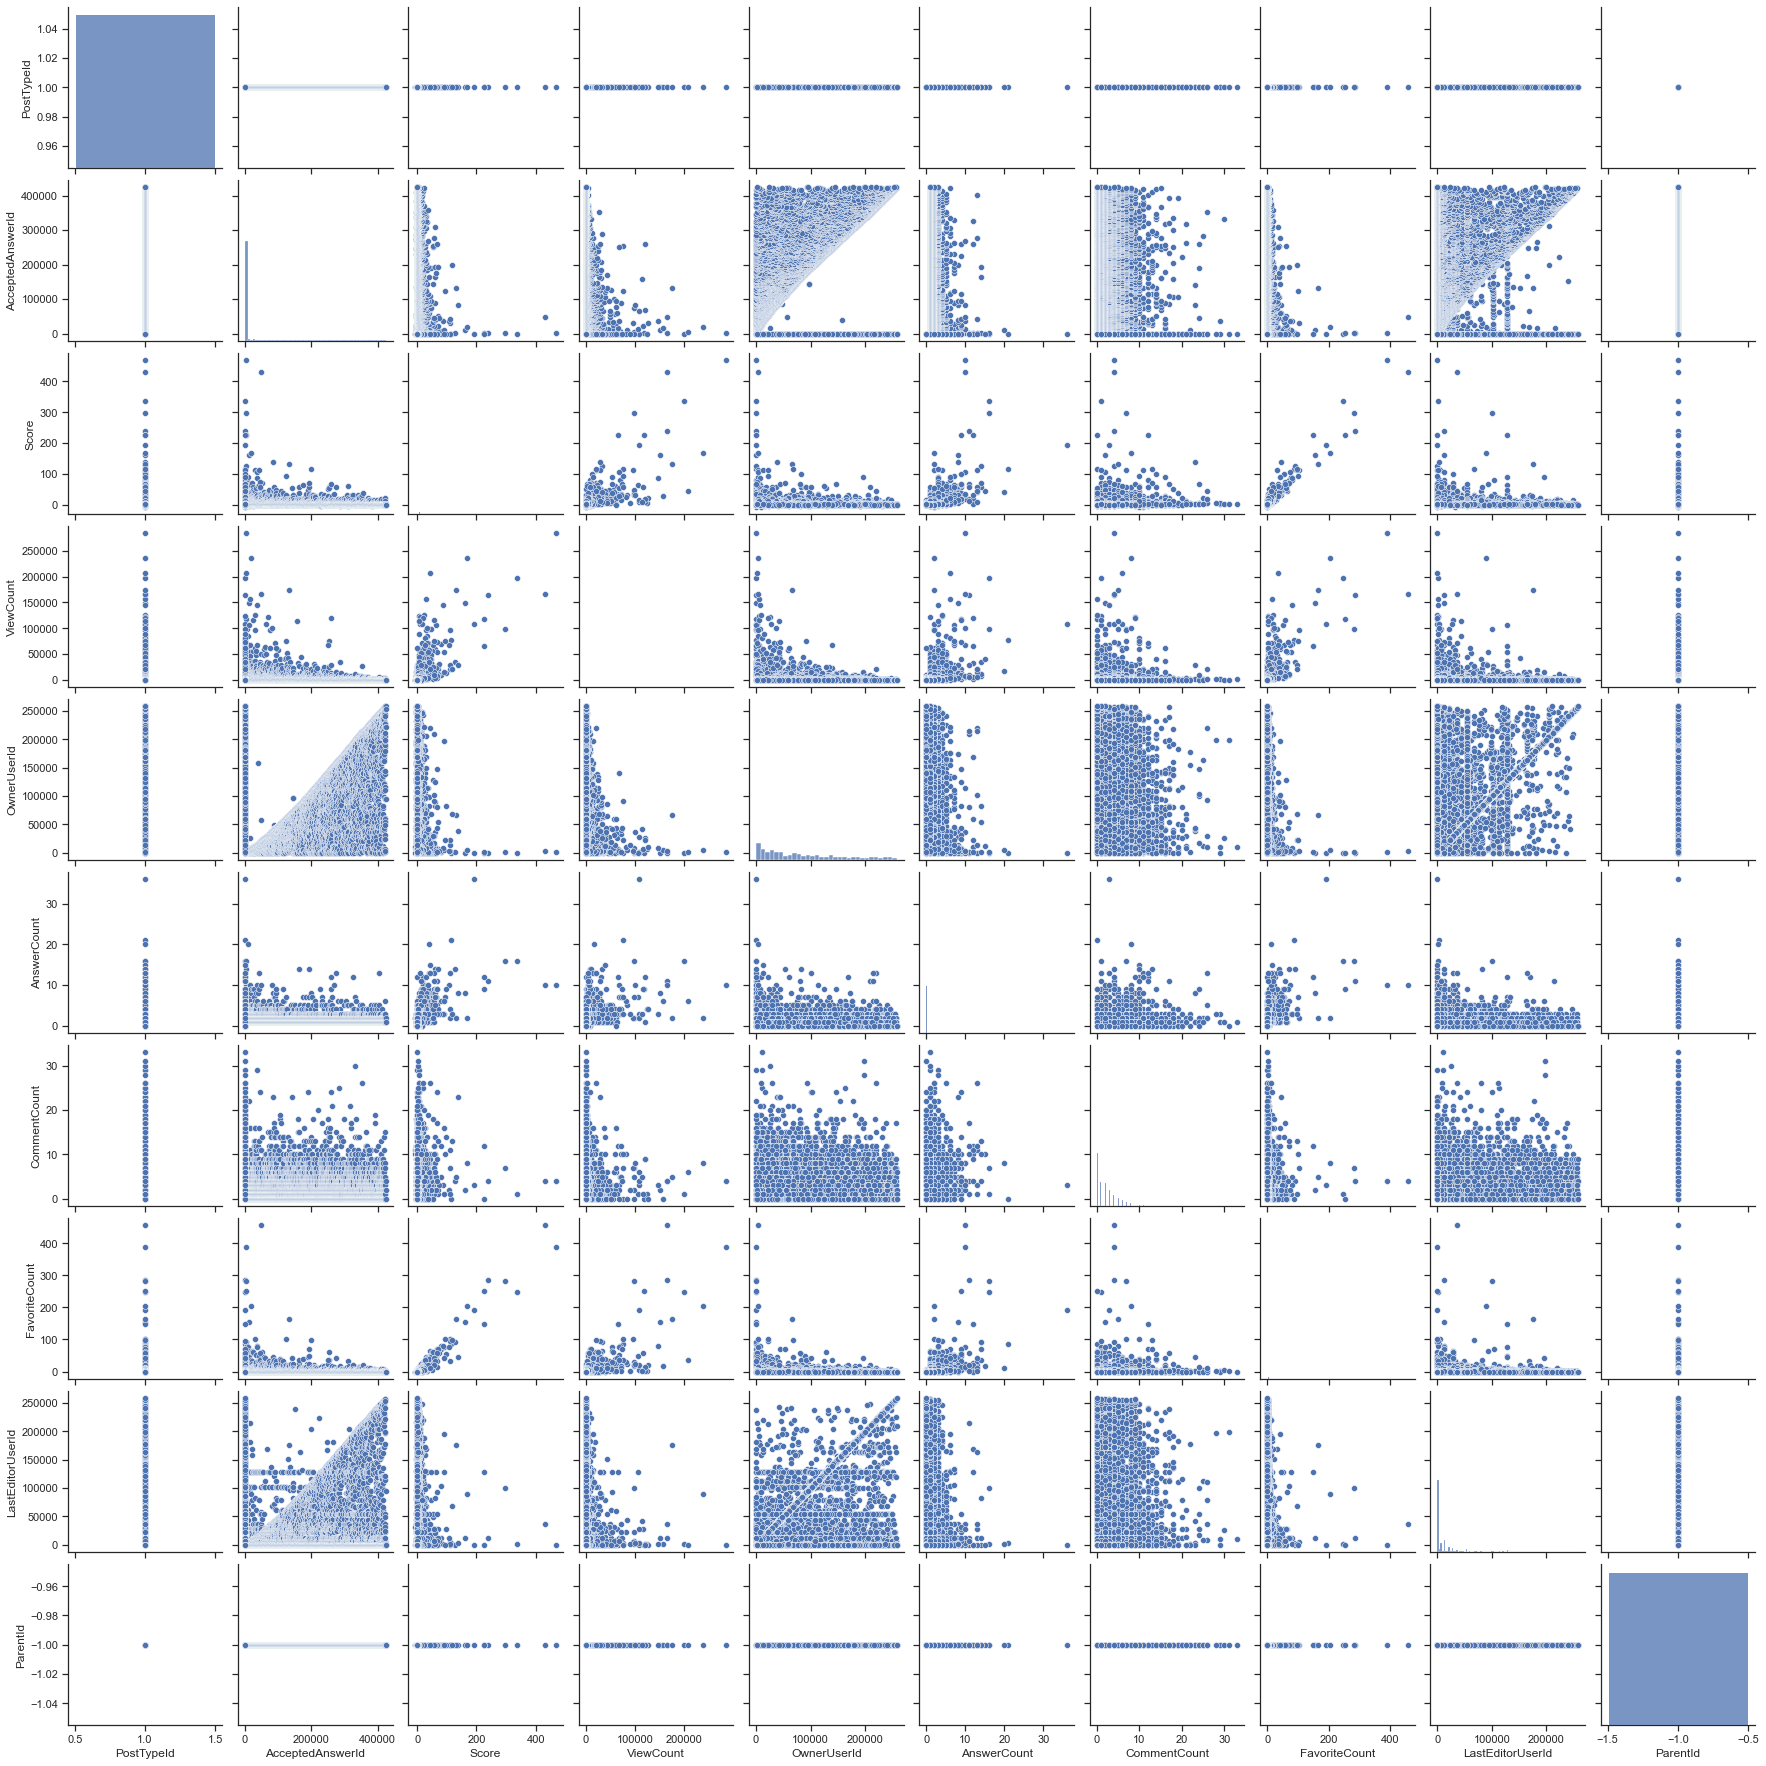

,Score,FavoriteCount
Score,1.000000,0.935385
FavoriteCount,0.935385,1.000000


In [8]:
numeric_df = select_numeric_non_id_columns(train_df)
plot_pairwise_relationships(numeric_df)

Pearson_Correlation = numeric_df[['Score', 'FavoriteCount']]
Pearson_Correlation.corr()

3.1 Judging purely on the graph's shape I would conclude that the two columns with the higest corelation are score and favorite count.

3.2 The correlation output above supports this as it shows that the two columns share a very high level of correlation.


### <a name="q4"></a> 4. Implement the function `plot_central_tendency_per_label(df, column)`, then select one of the numerical columns and generate the plot for it. <br>What can you conclude from it?

C:\Users\Galan\anaconda3\envs\Galen\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


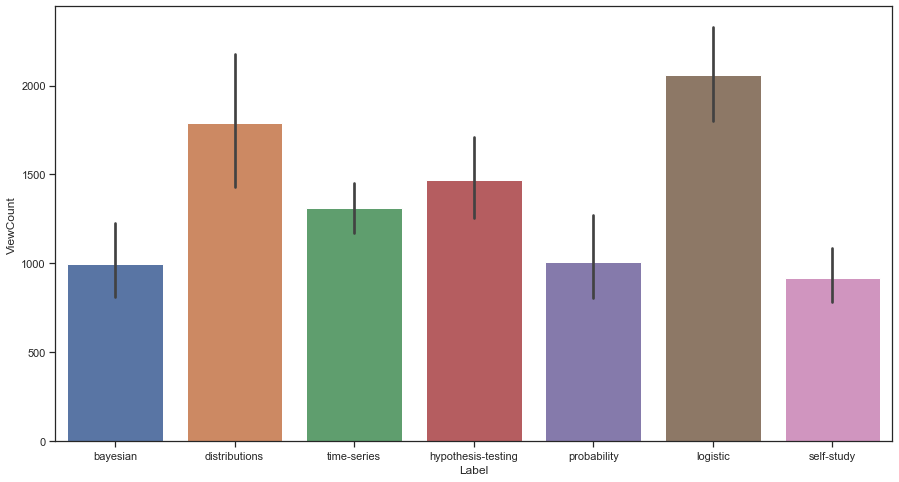

In [9]:
plot_central_tendency_per_label(numeric_df, 'ViewCount')

The above output indicates that posts labeled 'Logistic' reveice a higher average viewcount than other labels followed by "Distributions". The 'Self Study' label appears to be the least viewed but 'Bayesian' and 'Probablity' are not far behind, this could indicate an aversion to probability mathematics in our audience. 

According to the pair plot there is a positive correlation between 'ViewCount' and other variables such as 'Score' and 'FavoriteCount' indicating a relationship e.g. The more something is viewed the higher it's score or vice versa.